In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q4

In [153]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [154]:
#looking at top five
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [155]:
#looking at bottom 5
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


# Q5

In [156]:
# identifying rows, columns and data types
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# ANSWER: 7662 rows, 4 columns; 0=object, 1=int64, 3&4=float64

# Q6

In [157]:
#dropping in first line, renaming in second
gdp_df = gdp_df.drop('Value Footnotes', axis=1)
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [158]:
#view the head to verify
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


# Q7

In [159]:
#reset_index to give a name to the column so I can count those values in the following line
Q7a = gdp_df['Country'].value_counts().reset_index()

In [160]:
Q7b = Q7a['count'].value_counts()

In [161]:
Q7c = gdp_df['Year'].value_counts().sort_index()

# 202 countries have data for all years, while 40 countries are missing at least 5 years of data and the observations per year have been increasing over time.

# Q8

In [162]:
#isin() enables selecting by condition
Q8a = gdp_df[gdp_df['Year'].isin([2020])]

In [163]:
Q8a

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


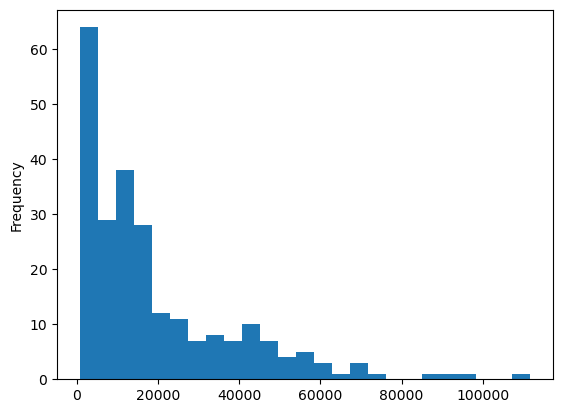

In [164]:
Histogram = Q8a['GDP_Per_Capita'].plot(kind='hist', bins = 25);

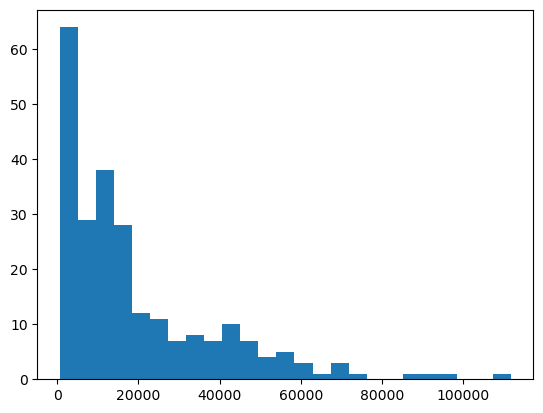

In [165]:
#second way to create the plot
Histogram2 = plt.hist(Q8a[['GDP_Per_Capita']], bins=25);

<Axes: ylabel='Density'>

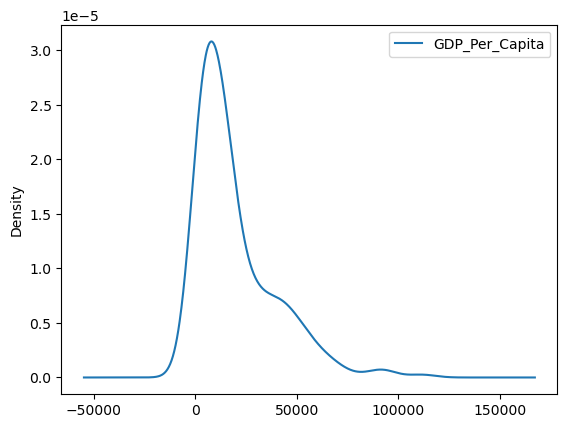

In [166]:
Q8a[['GDP_Per_Capita']].plot.density()

C:\Users\tayjy\AppData\Local\Temp\ipykernel_14212\4143431219.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Q8a['GDP_Per_Capita'], hist=False, kde=True);
C:\Users\tayjy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


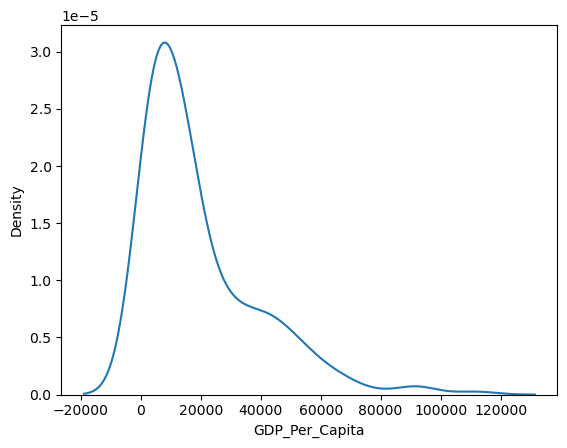

In [167]:
#alternate density plot
sns.distplot(Q8a['GDP_Per_Capita'], hist=False, kde=True);

In [168]:
(Q8a['GDP_Per_Capita'])

1        1968.341002
22       3455.023119
55       3957.933804
88      13278.369769
121     10844.770764
            ...     
7503    10450.622382
7536     5402.538773
7565    16204.169107
7598     3183.650773
7631     1990.319419
Name: GDP_Per_Capita, Length: 242, dtype: float64

In [169]:
(Q8a[['GDP_Per_Capita']])

,GDP_Per_Capita
1,1968.341002
22,3455.023119
55,3957.933804
88,13278.369769
121,10844.770764
...,...
7503,10450.622382
7536,5402.538773
7565,16204.169107
7598,3183.650773


<Axes: ylabel='GDP_Per_Capita'>

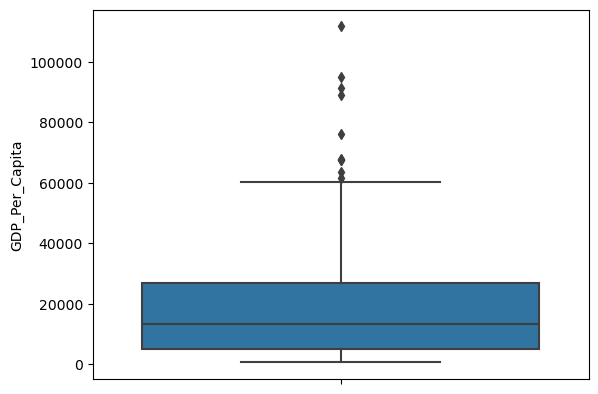

In [170]:
sns.boxplot( y=Q8a['GDP_Per_Capita'])

<Axes: ylabel='GDP_Per_Capita'>

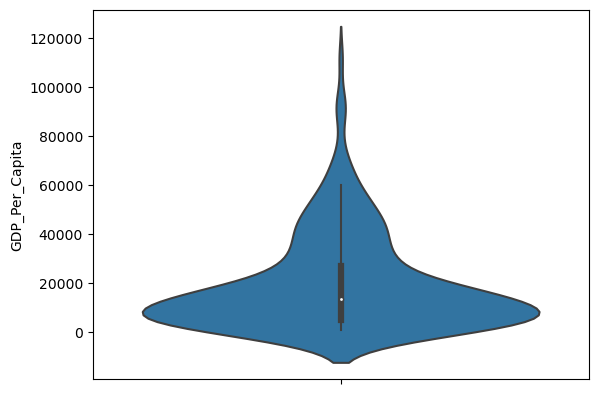

In [171]:
sns.violinplot(y=Q8a['GDP_Per_Capita'])

# Q9

In [172]:
Q8a['GDP_Per_Capita'].median()

13357.997573370474

# ANSWER =  13357.997573370474

# Q10

In [176]:
years = [1990,2000,2010,2020]

In [178]:
Q10 = gdp_df[gdp_df['Year'].isin(years)]

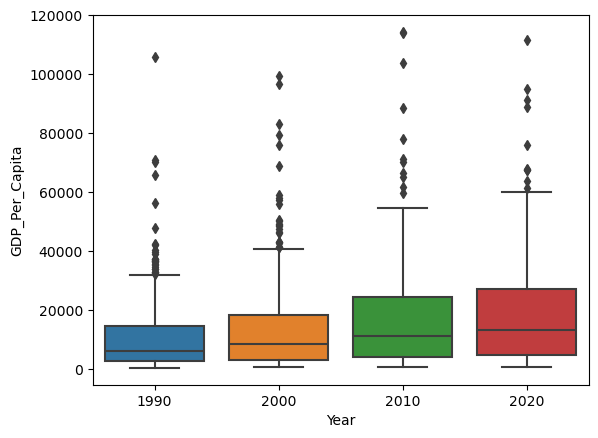

In [183]:
Boxplot = sns.boxplot(y=Q10['GDP_Per_Capita'], x=Q10['Year'])